In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("Training images:", x_train.shape)
print("Training labels:", y_train.shape)
print("Test images:", x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)


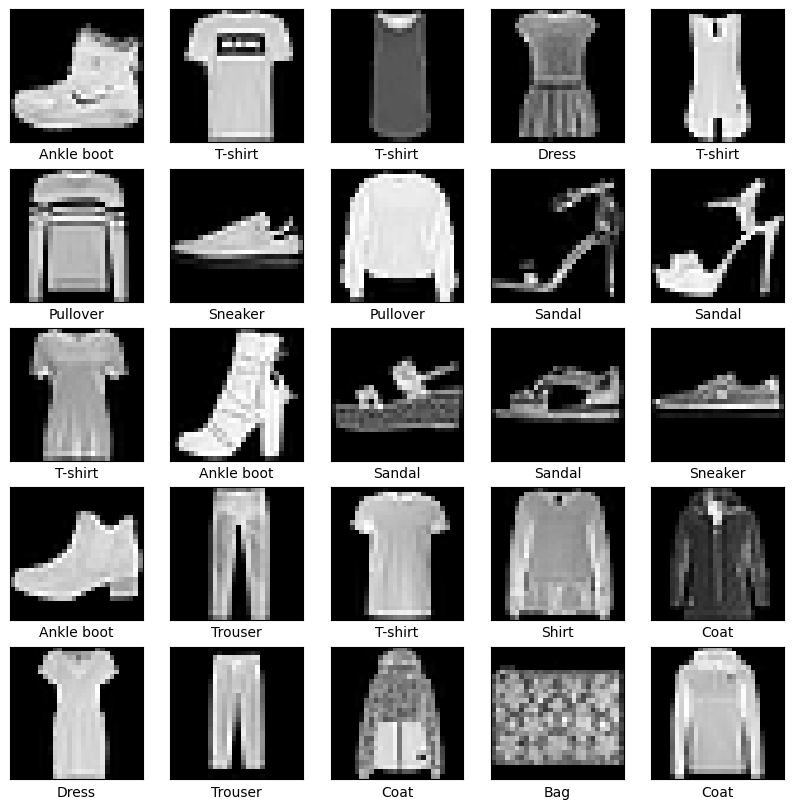

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
# Normalize pixel values to 0–1
x_train = x_train / 255.0
x_test  = x_test  / 255.0

# Add channel dimension → shape becomes (..., 28, 28, 1)
x_train = x_train[..., np.newaxis]
x_test  = x_test[..., np.newaxis]

# Convert labels to one-hot (needed for multi-class)
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat  = keras.utils.to_categorical(y_test, 10)

print("After preprocessing →", x_train.shape)

After preprocessing → (60000, 28, 28, 1)


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\GARGI\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    x_train, y_train_cat,
    epochs=12,               # start with 12 → usually enough
    batch_size=128,
    validation_split=0.1,    # uses 10% of training data for validation
    verbose=1
)

Epoch 1/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.7703 - loss: 0.6323 - val_accuracy: 0.8547 - val_loss: 0.3885
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8641 - loss: 0.3790 - val_accuracy: 0.8785 - val_loss: 0.3271
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.8832 - loss: 0.3216 - val_accuracy: 0.8950 - val_loss: 0.2861
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8967 - loss: 0.2877 - val_accuracy: 0.9000 - val_loss: 0.2752
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9043 - loss: 0.2639 - val_accuracy: 0.9023 - val_loss: 0.2664
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9130 - loss: 0.2438 - val_accuracy: 0.9093 - val_loss: 0.2415
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9177 - loss: 0.2270 - val_accuracy: 0.9157 - val_loss: 0.2280
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9241 - loss: 0.2090 - 

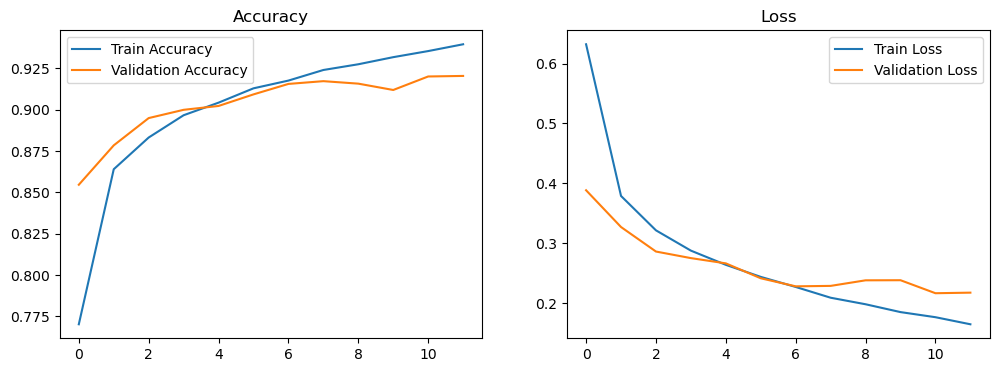

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest accuracy: {test_acc:.4f} → {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9131 - loss: 0.2324

Test accuracy: 0.9131 → 91.31%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


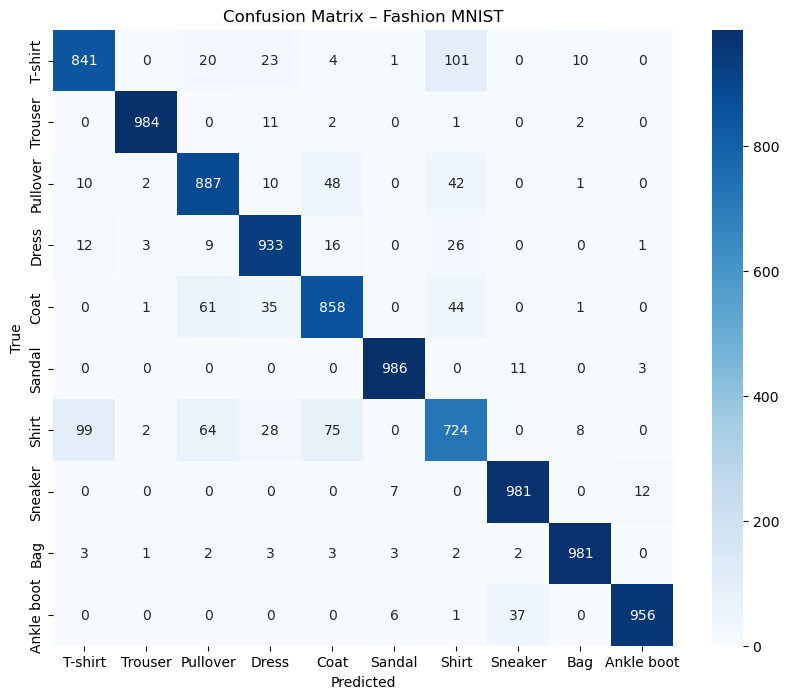

In [10]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix – Fashion MNIST')
plt.show()

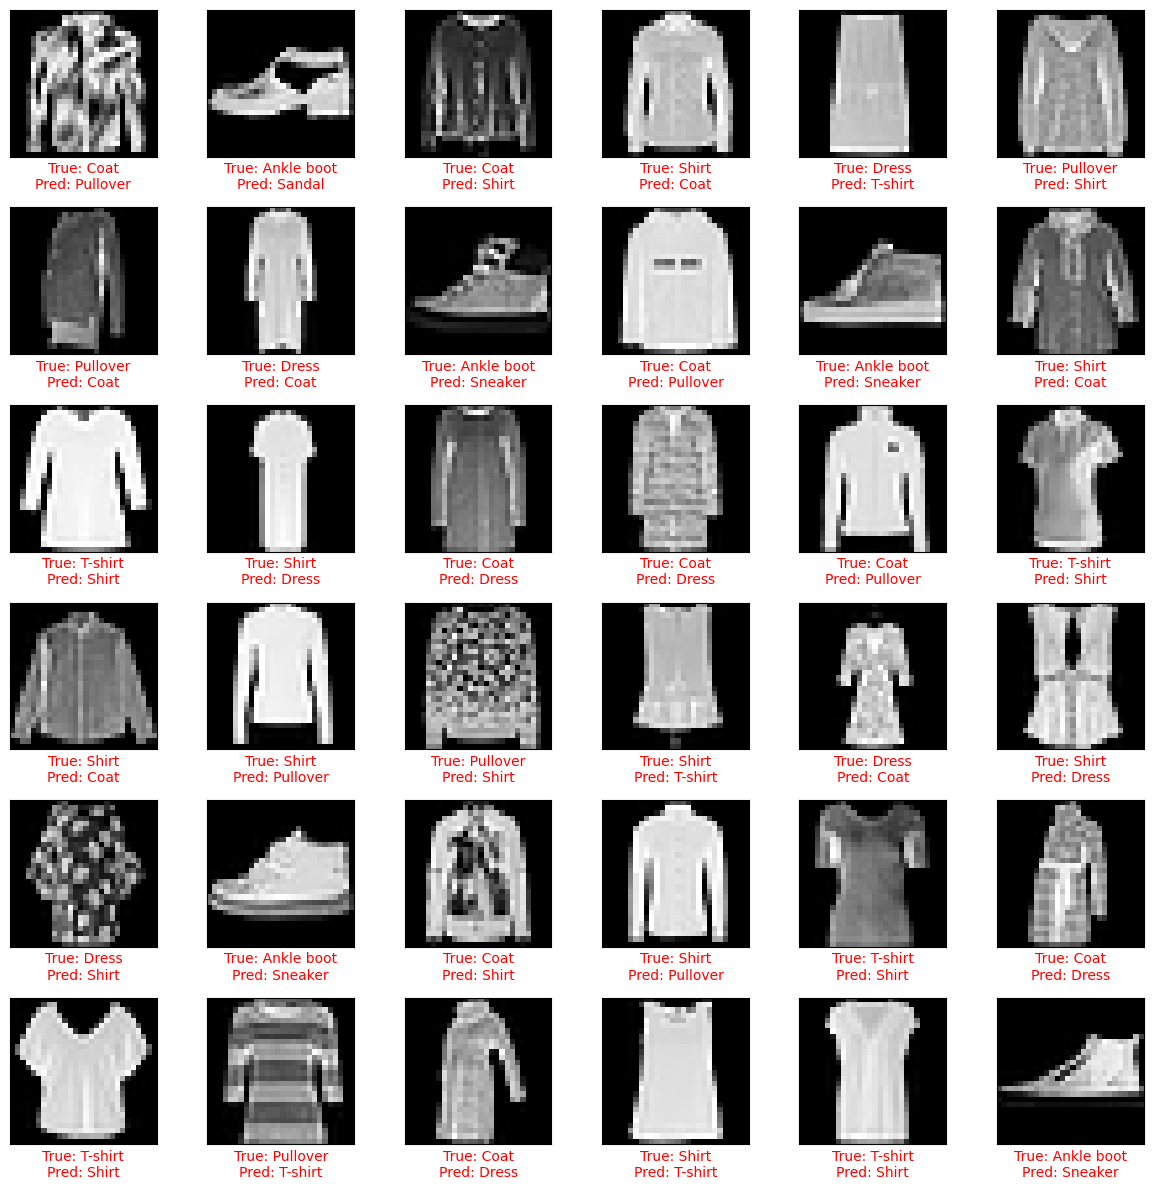

In [11]:
incorrect = np.where(y_pred_classes != y_test)[0]

plt.figure(figsize=(12,12))
for i, idx in enumerate(incorrect[:36]):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    true_label = class_names[y_test[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    plt.xlabel(f"True: {true_label}\nPred: {pred_label}", color='red')
plt.tight_layout()
plt.show()

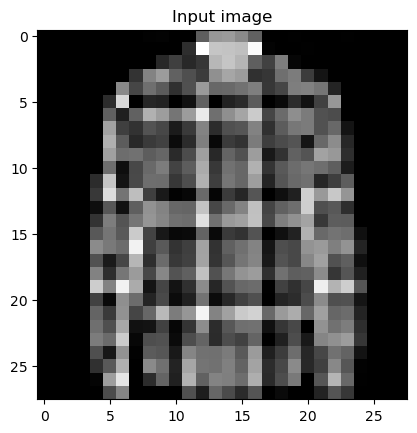

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted: Shirt


In [20]:
# Pick any test image
img = x_test[7]   # change number 0–9999

plt.imshow(img.squeeze(), cmap='gray')
plt.title("Input image")
plt.show()

pred = model.predict(img[np.newaxis, ...])   # add batch dimension
pred_class = np.argmax(pred)
print(f"Predicted: {class_names[pred_class]}")